<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/Nucleosome_phasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamics of Etv2 peak centric V-plots during reprogramming
by Wuming Gong


In [1]:
start_time <- Sys.time()

### Install external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [3]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages from CRAN

In [4]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
required_packages <- c(
  "BSgenome.Mmusculus.UCSC.mm10", 'TxDb.Mmusculus.UCSC.mm10.knownGene',
  "dplyr", 
  'motifmatchr',
  'cccd',
  'patchwork'
)

In [6]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'BiocVersion', 'BSgenome.Mmusculus.UCSC.mm10',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'motifmatchr', 'cccd', 'patchwork'

also installing the dependencies ‘formatR’, ‘rjson’, ‘filelock’, ‘lambda.r’, ‘futile.options’, ‘plyr’, ‘pracma’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘GenomicAlignments’, ‘restfulr’, ‘plogr’, ‘BiocFileCache’, ‘png’, ‘futile.logger’, ‘snow’, ‘BH’, ‘reshape2’, ‘poweRlaw’, ‘annotate’, ‘GO.db’, ‘R.utils’, ‘BiocGenerics’, ‘rtracklayer’, ‘matrixStats’, ‘XVector’, ‘RSQLite’, ‘RCurl’, ‘BiocIO’, ‘biomaRt’, ‘Biobase’, ‘KEGGREST’, ‘BiocParallel’, ‘caTools’, ‘CNEr’, ‘DirichletMultinomial’, ‘gtools’, ‘seqLogo’, ‘TFMPvalue’, ‘XML’, ‘MatrixGenerics’, ‘DelayedArray’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘GenomeInfoDbData’, ‘BSgenome’, ‘Ge

In [7]:
library(devtools)

Loading required package: usethis



### Install R packages from github

In [8]:
install_github("GreenleafLab/chromVARmotifs")

pillar    (1.6.2  -> 1.6.3 ) [CRAN]
stringi   (1.7.4  -> 1.7.5 ) [CRAN]
openssl   (1.4.3  -> 1.4.5 ) [CRAN]
mime      (0.11   -> 0.12  ) [CRAN]
cpp11     (0.3.1  -> 0.4.0 ) [CRAN]
lifecycle (1.0.0  -> 1.0.1 ) [CRAN]
hms       (1.1.0  -> 1.1.1 ) [CRAN]
tibble    (3.1.4  -> 3.1.5 ) [CRAN]
digest    (0.6.27 -> 0.6.28) [CRAN]
readr     (2.0.1  -> 2.0.2 ) [CRAN]


Installing 10 packages: pillar, stringi, openssl, mime, cpp11, lifecycle, hms, tibble, digest, readr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp0QnX1Q/remotes5a315fc32/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’
─  preparing ‘chromVARmotifs’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘chromVARmotifs_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install `seatac` from github

In [9]:
install_github('gongx030/seatac', quiet = FALSE)
devtools::reload(pkgload::inst("seatac"))
library(seatac)

tfautograph  (NA -> 0.3.2   ) [CRAN]
config       (NA -> 0.3.1   ) [CRAN]
here         (NA -> 1.0.1   ) [CRAN]
zeallot      (NA -> 0.1.0   ) [CRAN]
tfruns       (NA -> 1.5.0   ) [CRAN]
tensorflow   (NA -> 2.6.0   ) [CRAN]
reticulate   (NA -> 1.22    ) [CRAN]
keras        (NA -> 2.6.1   ) [CRAN]
abind        (NA -> 1.4-5   ) [CRAN]
gplots       (NA -> 3.1.1   ) [CRAN]
tfdatasets   (NA -> 2.6.0   ) [CRAN]
tfprobabi... (NA -> 0.12.0.0) [CRAN]


Installing 12 packages: tfautograph, config, here, zeallot, tfruns, tensorflow, reticulate, keras, abind, gplots, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp0QnX1Q/remotes5a667c9450/gongx030-seatac-a8a0de7/DESCRIPTION’
─  preparing ‘seatac’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘seatac_0.3.32.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, 

### Load R packages

In [10]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(cccd)
library(igraph)
library(Matrix)
library(ggplot2)
library(patchwork)
library(reshape2)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi


Attaching package: ‘dplyr’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    co

### TensorFlow setup

In [11]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Physical GPUs: 1

Logical GPUs: 1



In [12]:
Sys.time() - start_time

Time difference of 27.41499 mins

## Parameters

In [33]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 20L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 10L,

  vae_num_peaks = 5000L,
  vae_latent = c(10L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,

  n_neighbors = 1500L
)

## Load data

In [14]:
remote_bam_files = c(
  MEF_NoDox = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam',
  MEF_Dox_D1 = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D1.bam',
  MEF_Dox_D7_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam'
)
for (f in remote_bam_files){
  system(sprintf('wget -x -c -nH %s', f))
}
local_bam_files <- gsub('https://.+?/', './', remote_bam_files)

In [15]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (f in remote_bed_files){
  system(sprintf('wget -x -c -nH %s', f))
}
local_bed_files <- gsub('https://.+?/', './', remote_bed_files)

## Read V-plots

In [16]:
gr0 <- lapply(local_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = 200L)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))
counts <- matrix(counts, nrow = length(counts) / length(local_bam_files), ncol = length(local_bam_files), dimnames = list(NULL, local_bam_files))
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(local_bam_files)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

validate_bam | indexing bam files: ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

validate_bam | indexing bam files: ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D1.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D1.bam

validate_bam | indexing bam files: ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam

number of training peaks for VaeModel: 4384

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D1.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



## Training VAE model for V-plots

In [18]:
# this command will fail when being executed at the first time but runs file at the second time. 

model <- new('VaeModel', model = VaeModel(
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']],
  n_batches = x@n_samples
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)



In [19]:
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 3270.5977937 | loss_reconstruction= 3269.0625830 | loss_kl=    1.5351991

epoch=    10/   200 | beta=1.000e+00 | loss=  206.9559790 | loss_reconstruction=  204.8761770 | loss_kl=    2.0798019

epoch=    20/   200 | beta=1.000e+00 | loss=  200.5730100 | loss_reconstruction=  195.8736749 | loss_kl=    4.6993342

epoch=    30/   200 | beta=1.000e+00 | loss=  199.7694475 | loss_reconstruction=  194.5002517 | loss_kl=    5.2691952

epoch=    40/   200 | beta=1.000e+00 | loss=  199.3946612 | loss_reconstruction=  193.9657360 | loss_kl=    5.4289248

epoch=    50/   200 | beta=1.000e+00 | loss=  199.1980675 | loss_reconstruction=  193.7030582 | loss_kl=    5.4950088

epoch=    60/   200 | beta=1.000e+00 | loss=  199.0604045 | loss_reconstruction=  193.4570954 | loss_kl=    5.6033094

epoch=    70/   200 | beta=1.000e+00 | loss=  198.9331022 | loss_reconstruction=  193.3018575 | loss_kl=    5.6312449

epoch=    80/   200 | beta=1.000e+00 | loss=  19

In [20]:
rowData(x)$group <- 'background'

## Read Etv2 peaks

In [21]:
remote_etv2_peaks_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/all_Etv2_peaks.rds'
system(sprintf('wget -x -c -nH %s', remote_etv2_peaks_file))
local_etv2_peaks_file <- gsub('https://.+?/', './', remote_etv2_peaks_file)

In [22]:
gr_query <- readRDS(local_etv2_peaks_file)
gr_query <- gr_query %>% resize(fix = 'center', width = ARGS[['block_size']])
gr_query <- gr_query[gr_query$group[, 'MEF_Dox_d1_Etv2'] | gr_query$group[, 'MEF_Dox_d7_Etv2']]
sprintf('number of Etv2 peaks: %d', length(gr_query)) %>% message()

number of Etv2 peaks: 127559



## Remove Etv2 peaks that have no canonical Etv2 motifs at center

In [23]:
data('homer_pwms') # 321 TF motifs from Homer database
Etv2_canonical <- homer_pwms['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)']
motif_ix <- matchMotifs(
  Etv2_canonical,
  resize(gr_query, width = 50L, fix = 'center'),
  genome = BSgenome.Mmusculus.UCSC.mm10,
  p.cutoff = 5e-4
)

In [24]:
has_motif <- assays(motif_ix)$motifMatches[, 1]
gr_query <- gr_query[has_motif]

In [25]:
sprintf('number of Etv2 peaks: %d', length(gr_query)) %>% message()

number of Etv2 peaks: 21343



## Remove Etv2 peaks near the promoters

In [26]:
gr_query <- gr_query[!gr_query %over% promoters(genes(TxDb.Mmusculus.UCSC.mm10.knownGene), upstream = 1500, downstream = 500)]  # remove Etv2 motifs overlaping with promoters

  66 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.



In [27]:
sprintf('number of Etv2 peaks: %d', length(gr_query)) %>% message()

number of Etv2 peaks: 17605



## Read Vplots of the remaining Etv2 peaks

In [28]:
group <- rep(NA, length(gr_query))
group[gr_query$group[, 'MEF_Dox_d1_Etv2'] & !gr_query$group[, 'MEF_Dox_d7_Etv2']] <- 'early'
group[!gr_query$group[, 'MEF_Dox_d1_Etv2'] & gr_query$group[, 'MEF_Dox_d7_Etv2']] <- 'late'
group[gr_query$group[, 'MEF_Dox_d1_Etv2'] & gr_query$group[, 'MEF_Dox_d7_Etv2']] <- 'sustained'
x_query <- read_vplot(granges(gr_query), filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])
rowData(x_query)$group <- group
counts <- matrix(rowSums(assays(x_query)$counts), length(gr_query), length(local_bam_files))
valid <- rowSums(counts >=  ARGS[['min_reads']]) == length(local_bam_files)
gr_query <- gr_query[valid]
valid <- rep(valid, length(local_bam_files))
x_query <- x_query[valid]

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D1.bam

read_bam | reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)



## Predict the fragment size on the Etv2 peaks

In [29]:
x <- rbind(x, x_query)
sprintf('number of Etv2 peaks: %d', length(gr_query)) %>% message()

number of Etv2 peaks: 11161



In [30]:
x <- model %>% predict_fragment_size(x, batch_size = 32L, width = 100L)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)



## Classify the V-plots based on the fragment size distribution

In [34]:
fs <- rowData(x)$predicted_fragment_size
fs <- (tf$cast(fs, tf$float32) - tf$cast(fs, tf$float32) %>% tf$reduce_mean(0L, keepdims = TRUE)) %>% as.matrix()
fs <- t(scale(t(fs)))
fs_train <- fs[rowData(x)$group == 'background', ]
classes <- nng(fs_train, k = ARGS[['n_neighbors']], mutual = FALSE, use.fnn = TRUE)  %>%
  as.undirected(mode = 'mutual') %>%
  cluster_louvain() %>%
  membership()

number of fragment size classes: 7



In [36]:
g <- sparseMatrix(i = 1:nrow(fs_train), j = classes, dims = c(nrow(fs_train), max(classes)))
g <- g[, colSums(g) > 10]
valid <- rowSums(g) > 0
fs_train <- fs_train[valid, ]
g <- g[valid, ]
classes <- max.col(g)
k <- ncol(g)
centers <-  Diagonal(x = 1 / colSums(g)) %*% t(g) %*% fs_train
centers <- as.matrix(centers)
centers <- t(scale(t(centers)))
h <- hclust(dist(centers))$order
# classes <- h[classes] # reorder class labels
classes <- order(h)[classes]
sprintf('number of fragment size classes: %d', k) %>% message()
rowData(x)$cluster <- FNN::knn(fs_train, fs, factor(classes))  # predicting all regions

number of fragment size classes: 6



## Read NucleoATAC results

In [37]:
remote_nucleoatac_files <- gsub('.bam', '.nucleoatac_signal.smooth.bw', remote_bam_files)
for (f in remote_nucleoatac_files){
  system(sprintf('wget -x -c -nH %s', f))
}
local_nucleoatac_files <- gsub('https://.+?/', './', remote_nucleoatac_files)

In [38]:
rowData(x)$nucleoatac <- matrix(0, nrow(x), ARGS[['window_size']])
for (i in 1:length(local_nucleoatac_files)){
  sprintf('reading %s', local_nucleoatac_files[i]) %>% message()
  j <- rowData(x)$batch == names(remote_bam_files)[i]
  gr2 <- resize(granges(x)[j], width = ARGS[['window_size']], fix = 'center')
  cvg <- rtracklayer::import(local_nucleoatac_files[i], which = gr2, format = 'BigWig')
  seqlevels(cvg, pruning.mode = 'coarse') <- seqlevels(gr2)
  seqlengths(cvg) <- seqlengths(gr2)
  genome(seqinfo(cvg)) <- genome(seqinfo(gr2))
  rowData(x)$nucleoatac[j, ] <- coverage(cvg, weight = 'score')[gr2] %>% as.matrix() %>% scale01()
}

reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.nucleoatac_signal.smooth.bw

reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D1.nucleoatac_signal.smooth.bw

reading ./gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.nucleoatac_signal.smooth.bw



## Plot the Vplots of each class

In [63]:
# Note that because of the random initialization of tensorflow, the resulting order may be different for each run. 
class_orders <- c(6, 5, 4, 1, 3, 2)
rowData(x)$cluster <- factor(order(class_orders)[rowData(x)$cluster])

In [53]:
k <- nlevels(rowData(x)$cluster)
g <- sparseMatrix(i = 1:nrow(x), j = as.numeric(rowData(x)$cluster), dims = c(nrow(x), k))
g[rowData(x)$group != 'background'] <- FALSE
centers <-  Diagonal(x = 1 / colSums(g)) %*% t(g) %*% rowData(x)$predicted_fragment_size
centers <- as.matrix(centers)
centers <- t(scale(t(centers)))

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)

dimnames(.) <- NULL:  translated to 
dimnames(.) <- list(NULL,NULL)  <==>  unname(.)



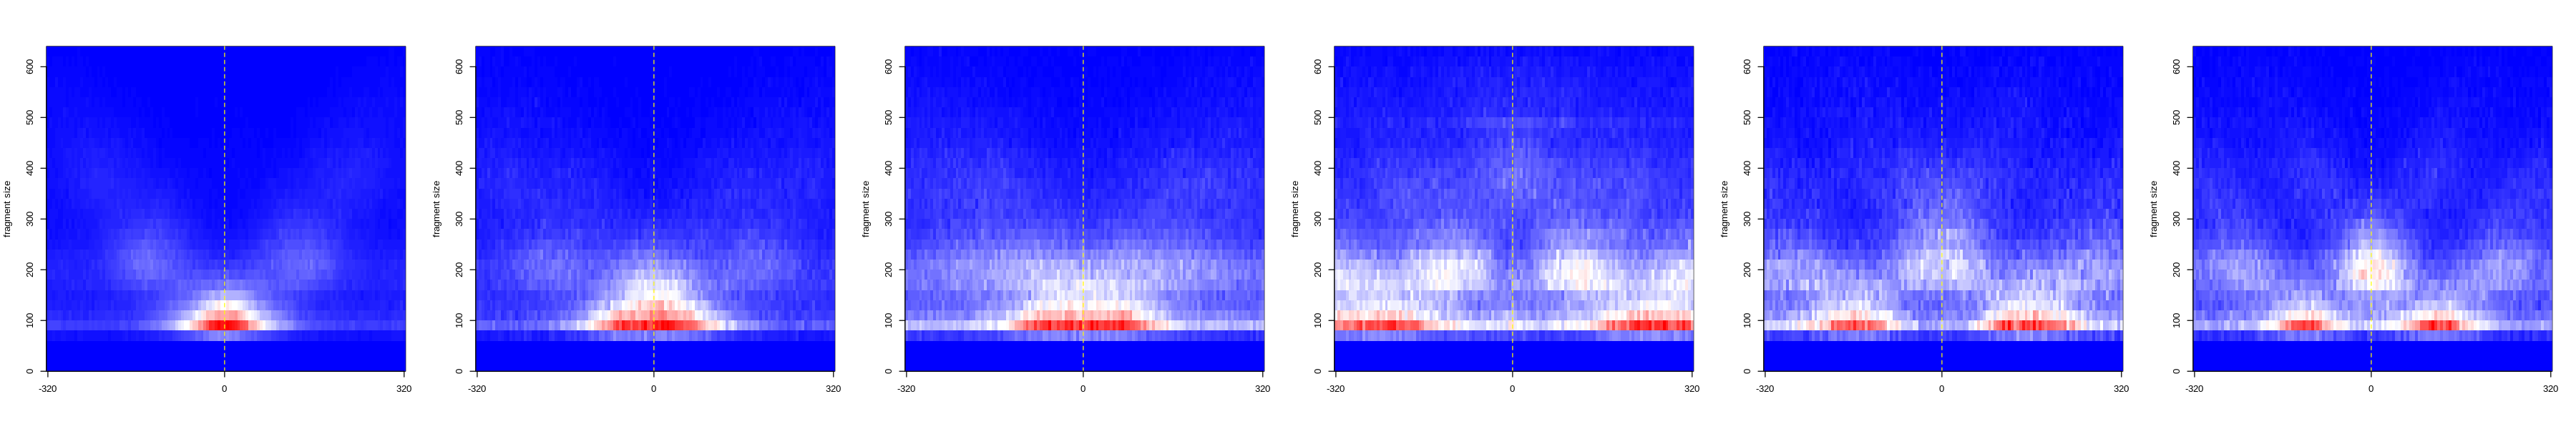

In [54]:
options(repr.plot.width = 30, repr.plot.height = 5)
par(mfrow = c(1, k))
for (i in 1:k){ vplot(x[rowData(x)$cluster == i]) }

In [55]:
g1 <- data.frame(value = c(centers), cluster = 1:k, fragment_size = rep(x@centers, each = k)) %>%
  mutate(cluster = factor(cluster)) %>%
  ggplot(aes(y = cluster, x = fragment_size, fill = value)) +
  geom_tile() +
  scale_fill_gradientn(colours = c("blue", 'white', "red"), limits = c(-3, 3), oob = scales::squish) +
  scale_x_continuous(breaks = seq(0, 800, by = 100)) +
  scale_y_discrete(limits=rev)

In [56]:
d <- do.call('rbind', lapply(1:k, function(kk) data.frame(cluster = kk, fragment_size = x@centers, value = rowData(x)$predicted_fragment_size[rowData(x)$cluster== kk & rowData(x)$group == 'background', ] %>% colMeans())))
g2 <- d %>%
  mutate(cluster = factor(cluster)) %>%
  ggplot(aes(x = fragment_size, y = value, color = cluster)) +
    geom_line(size = 1)+
    scale_x_continuous(breaks = seq(0, 800, by = 100))

In [57]:
d_nucleoatac <- do.call('rbind', lapply(1:k, function(kk) data.frame(cluster = kk, position = 1:ncol(rowData(x)$nucleoatac) - 1/2 * ncol(rowData(x)$nucleoatac), value = rowData(x)$nucleoatac[rowData(x)$cluster== kk & rowData(x)$group == 'background', ] %>% colMeans())))
g3 <- d_nucleoatac %>%
  mutate(cluster = factor(cluster)) %>%
  ggplot(aes(x = position, y = value, color = cluster)) +
    geom_line(size = 1)

In [58]:
g3b <- d_nucleoatac %>%
  mutate(cluster = factor(cluster)) %>%
  ggplot(aes(x = position, y = cluster, fill = value)) +
    geom_raster() +
    scale_fill_gradientn(colours = c("black", 'green')) +
    scale_y_discrete(limits=rev)

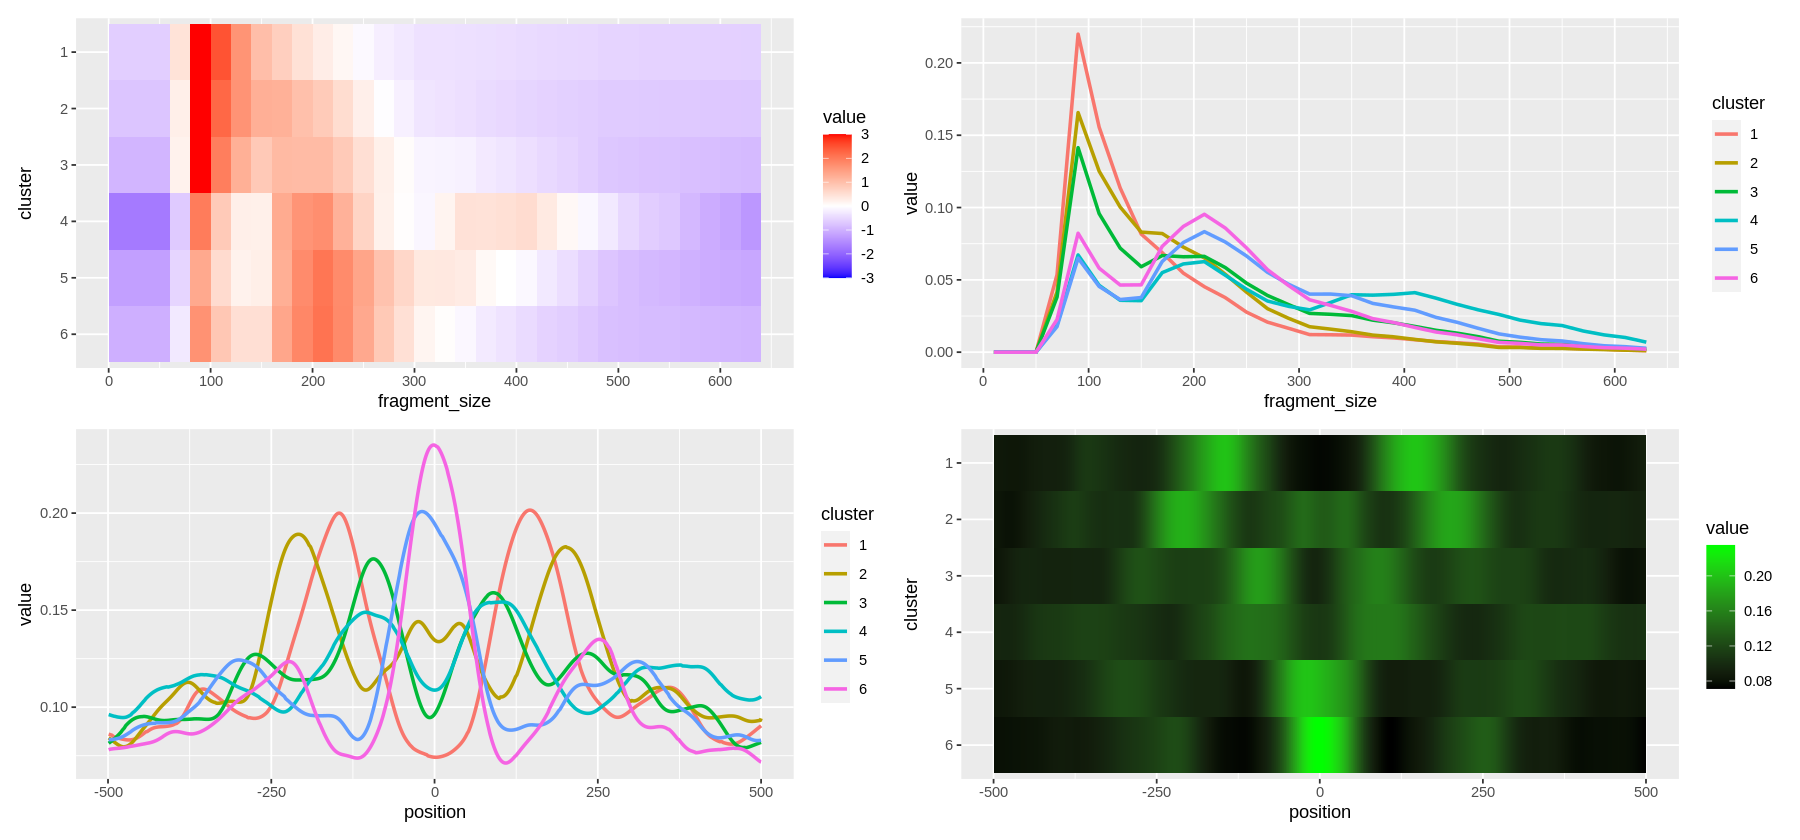

In [59]:
options(repr.plot.width = 15, repr.plot.height = 7)
g1 + g2 + g3 + g3b

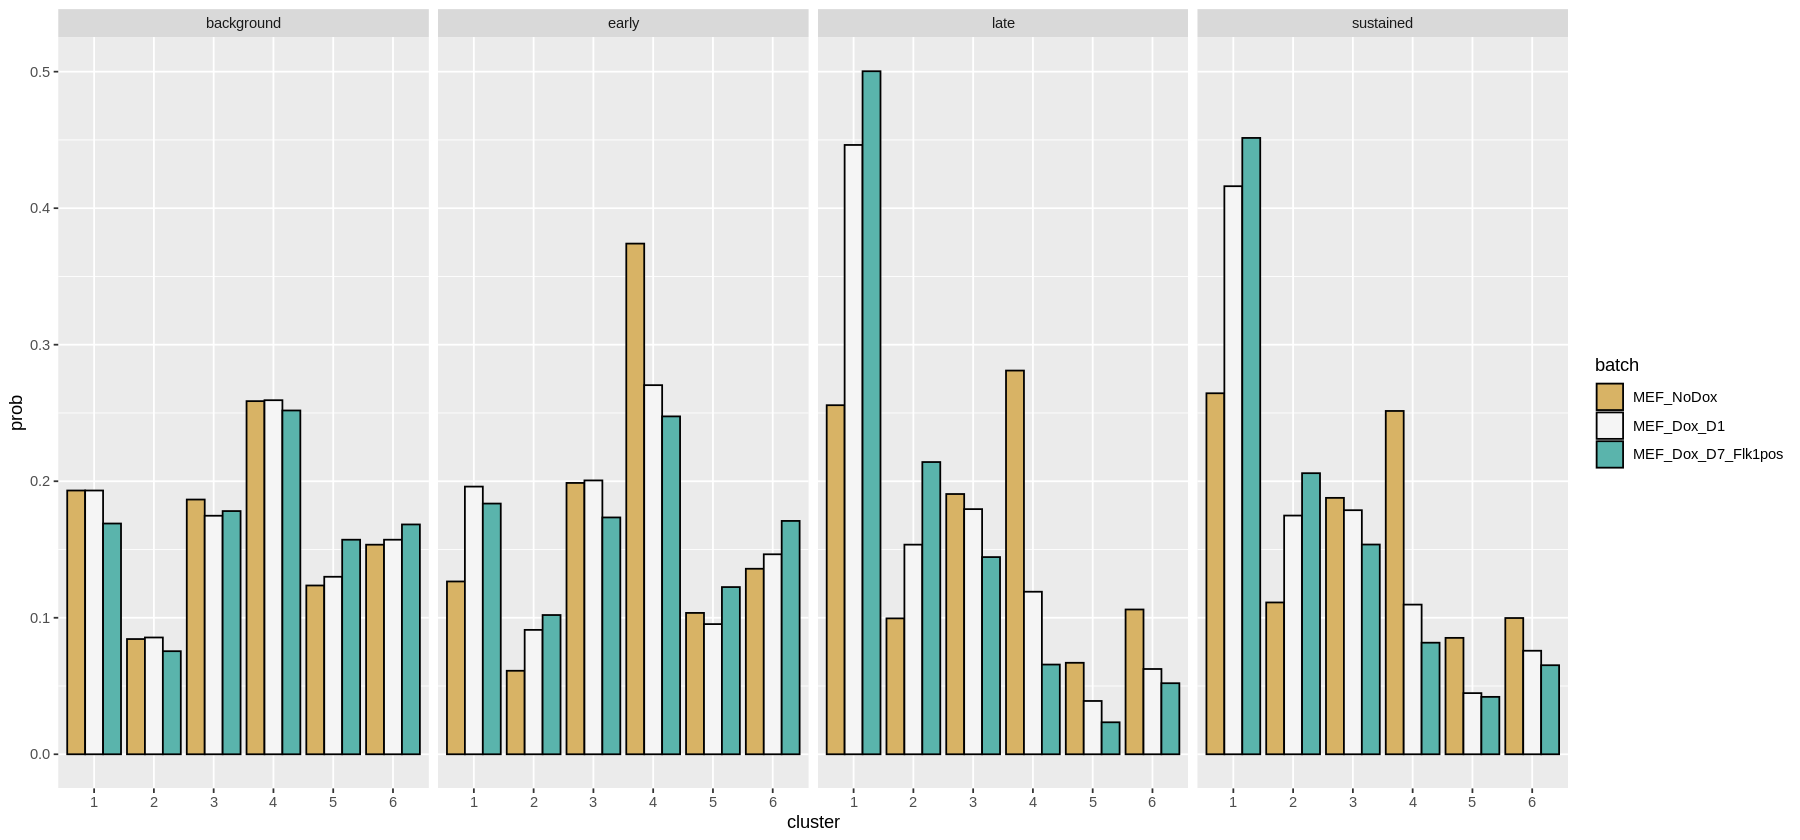

In [60]:
data.frame(batch = rowData(x)$batch, group = rowData(x)$group, cluster = rowData(x)$cluster) %>%
  mutate(batch = factor(batch, c('MEF_NoDox', 'MEF_Dox_D1', 'MEF_Dox_D7_Flk1pos'))) %>%
  group_by(batch, group, cluster) %>%
  count() %>%
  ungroup() %>%
  group_by(batch, group) %>%
  mutate(prob = n / sum(n)) %>%
  ggplot(aes(x = cluster, y = prob, fill = batch)) +
    geom_bar( stat = "identity", position=position_dodge(), color = 'black') +
    facet_grid(.~ group) +
    scale_fill_brewer(palette="BrBG")

## Plot transition between fragment size cluters for each Etv2 binding group

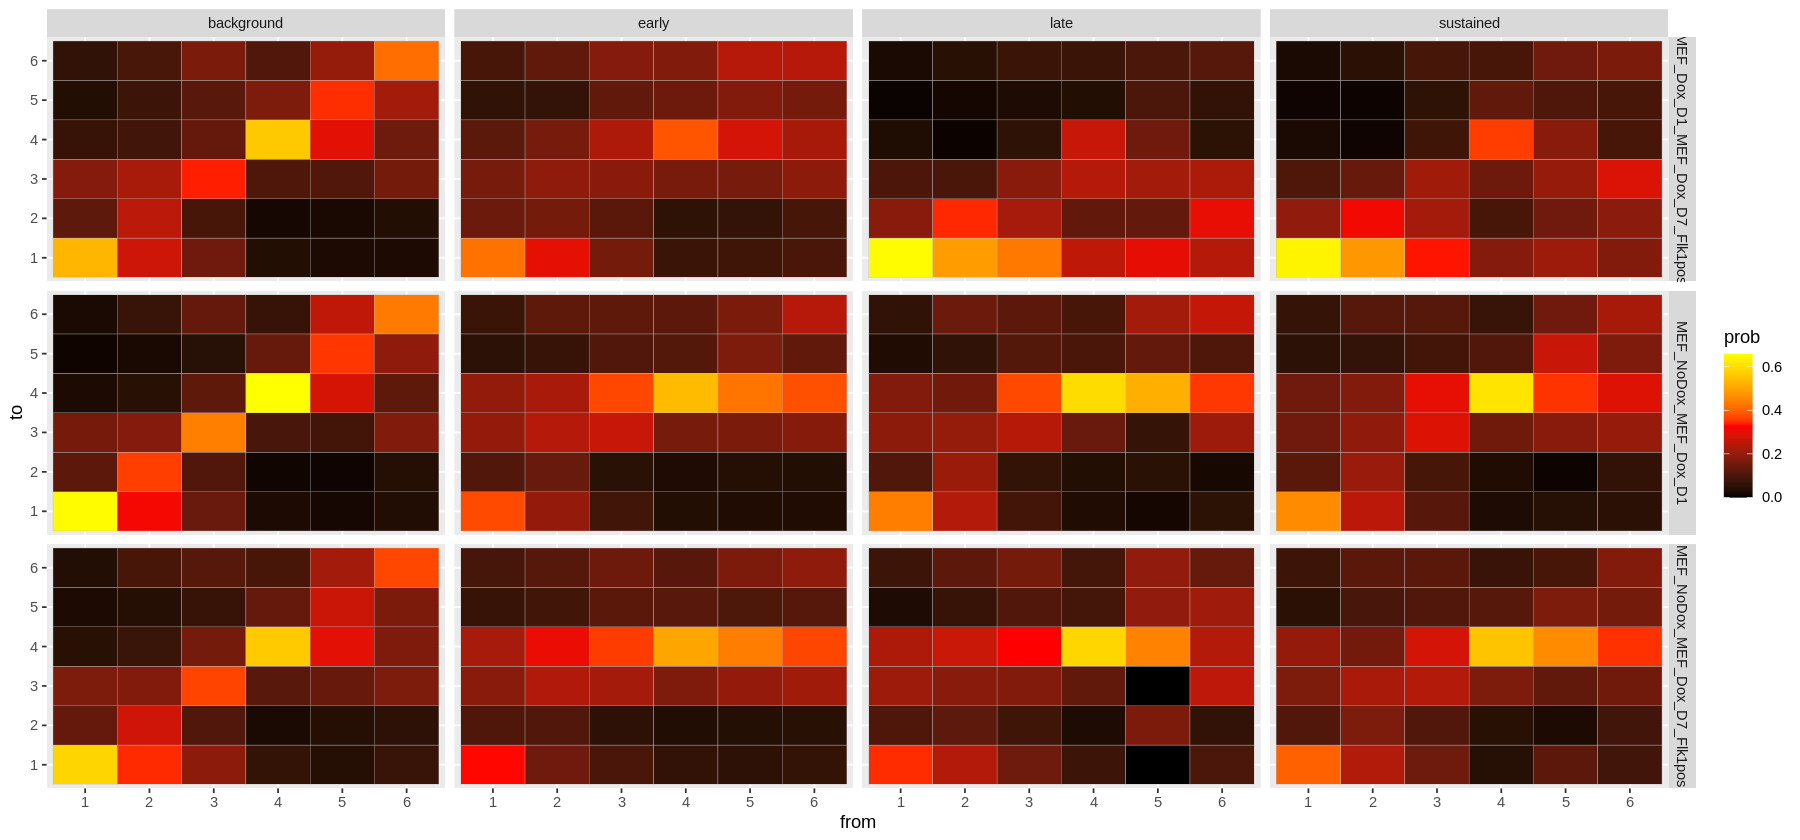

In [62]:
options(repr.plot.width = 15, repr.plot.height = 7)

df <- expand.grid(group = c('background', 'early', 'late', 'sustained'), from = c('MEF_NoDox', 'MEF_Dox_D1', 'MEF_Dox_D7_Flk1pos'), to = c('MEF_NoDox', 'MEF_Dox_D1', 'MEF_Dox_D7_Flk1pos'), stringsAsFactors = FALSE) %>%
  filter((from == 'MEF_NoDox' & to == 'MEF_Dox_D1') | (from == 'MEF_Dox_D1' & to == 'MEF_Dox_D7_Flk1pos') | (from == 'MEF_NoDox' & to == 'MEF_Dox_D7_Flk1pos'))

d <- do.call('rbind', lapply(1:nrow(df), function(i){
  data.frame(id = rowData(x)$id, batch = rowData(x)$batch, group = rowData(x)$group, cluster = rowData(x)$cluster) %>%
    filter(group == df[i, 'group']) %>%
    filter(batch %in% c(df[i, 'from'],  df[i, 'to'])) %>%
    dcast(id ~ batch, value.var = 'cluster') %>%
    rename(from = 2, to = 3) %>%
    mutate(from = factor(from), to = factor(to)) %>%
    group_by(from, to, .drop = FALSE) %>%
    count() %>%
    ungroup() %>%
    group_by(from) %>%
    mutate(prob = n / sum(n)) %>%
    mutate(group = df[i, 'group'], stage = sprintf('%s_%s', df[i, 'from'], df[i, 'to']))
}))

d %>%
  ggplot(aes(x = from, y = to, fill = prob)) +
    geom_tile(color = 'gray') +
    scale_fill_gradientn(colours = c("black", 'red', 'yellow')) +
#   scale_x_discrete(limits=rev) + scale_y_discrete(limits=rev) +
    facet_grid(stage ~ group)

## SessionInfo

In [64]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] reshape2_1.4.4                           
 [2] patchwork_1.1.1                          
 [3] ggplot2_3.3.5                            
 [4] Matrix_1.3-4                             
 [5] cccd_1.5                                 
 [6] igraph

In [65]:
Sys.time() - start_time

Time difference of 1.716737 hours